### In this project, we will try to predict whether it is risky or not risky to provide credit to people using various machine learning models and Deploy the model with Tkinter library

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [37]:
df=pd.read_csv('german_credit_data.csv')

#### View top 5 rows

In [38]:
df.head(1)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good


In [39]:
df['Job'].unique()

array([2, 1, 3, 0], dtype=int64)

#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [40]:
df.shape

(1000, 11)

#### Columns

In [41]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [42]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [43]:
df.fillna({'Saving accounts':'Unknown','Checking account':'Unknown'},inplace=True)

#### Unique elements in each column

In [44]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}: {df[column].unique()}")


Unique values in Sex: ['male' 'female']
Unique values in Housing: ['own' 'free' 'rent']
Unique values in Saving accounts: ['Unknown' 'little' 'quite rich' 'rich' 'moderate']
Unique values in Checking account: ['little' 'moderate' 'Unknown' 'rich']
Unique values in Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Unique values in Risk: ['good' 'bad']


##### Create a New column Id by replacing unnamed column

In [45]:
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [46]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [48]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [49]:
df.head(1)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good


In [50]:
df.groupby(['Sex', 'Risk', 'Purpose']).size()

Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

In [51]:
df.groupby(['Purpose', 'Risk', 'Sex']).size()

Purpose              Risk  Sex   
business             bad   female      7
                           male       27
                     good  female     12
                           male       51
car                  bad   female     40
                           male       66
                     good  female     54
                           male      177
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   female      9
                           male       14
                     good  female     15
                           male       21
furniture/equipment  bad   female     28
                           male       30
                     good  female     46
                           male       77
radio/TV             bad   female     19
                           male       43
                     good  female     66
                       

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

<Axes: xlabel='Risk', ylabel='count'>

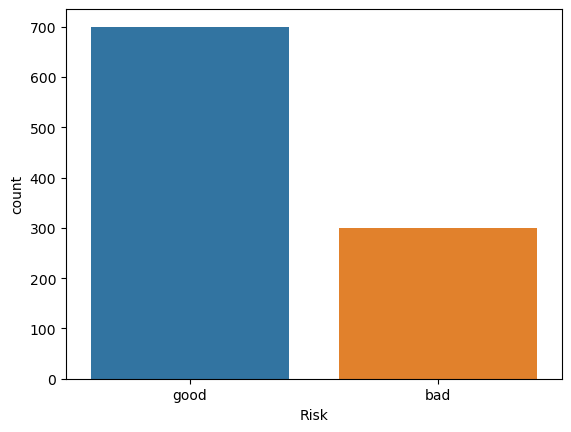

In [52]:
sns.countplot(x=df['Risk'])

<Axes: xlabel='Sex', ylabel='count'>

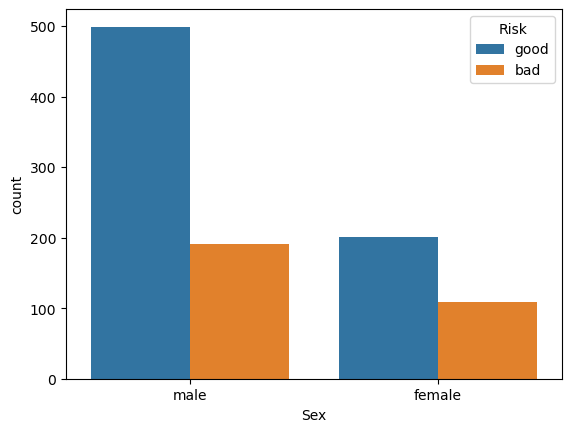

In [17]:
sns.countplot(x=df['Sex'],hue=df['Risk'])

<Axes: xlabel='Duration', ylabel='count'>

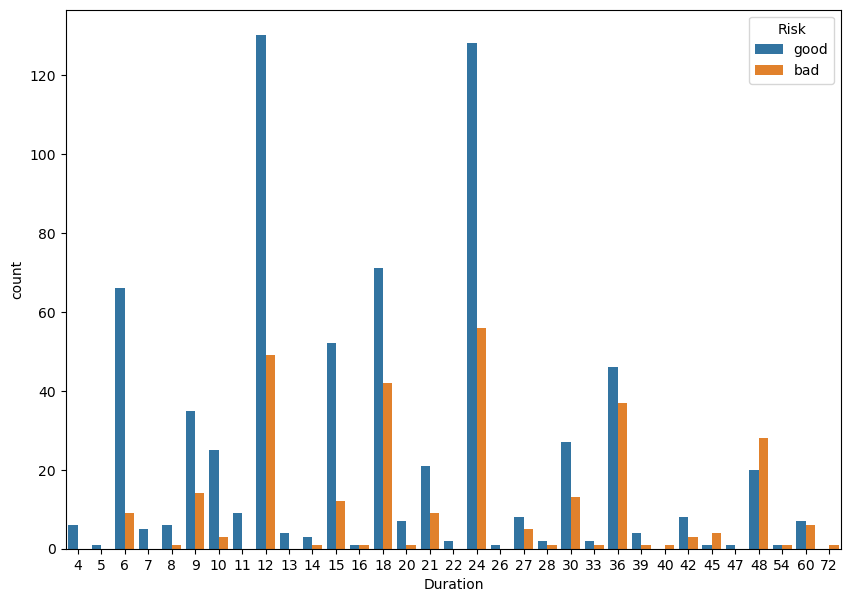

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Duration'],hue=df['Risk'])

<Axes: xlabel='Sex', ylabel='count'>

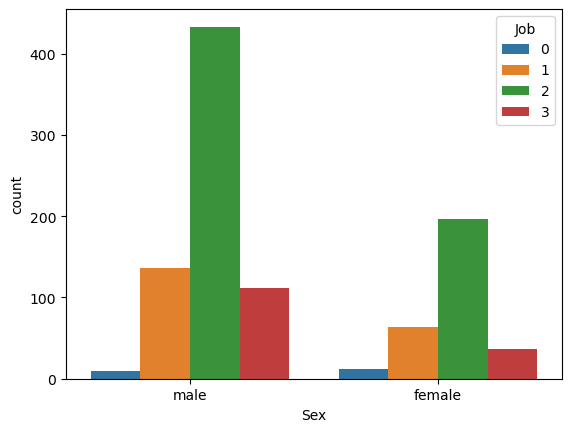

In [32]:
sns.countplot(x=df['Sex'],hue=df['Job'])

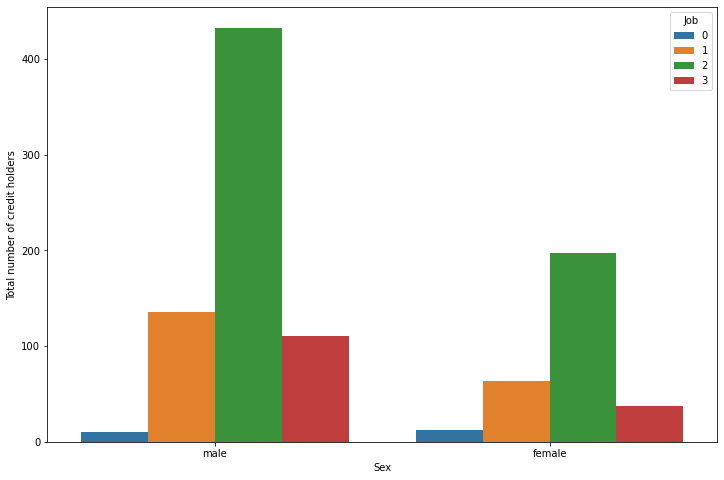

<Axes: xlabel='Risk', ylabel='count'>

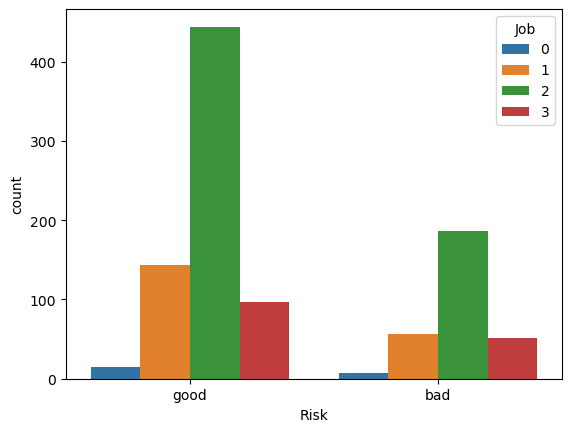

In [33]:
sns.countplot(x=df['Risk'],hue=df['Job'])

<Axes: xlabel='Risk', ylabel='count'>

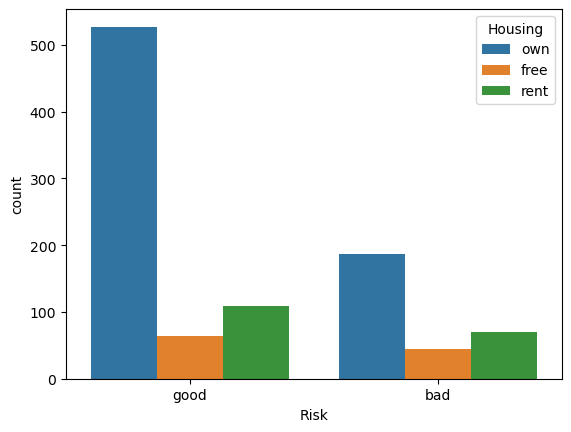

In [37]:
sns.countplot(x=df['Risk'],hue=df['Housing'])

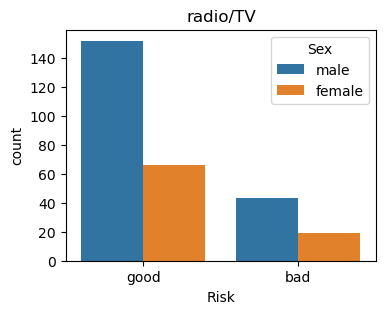

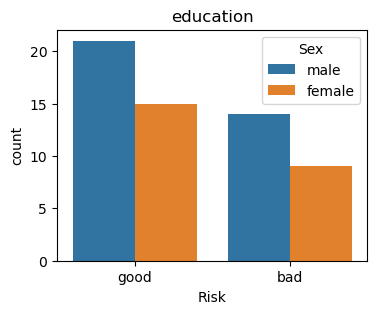

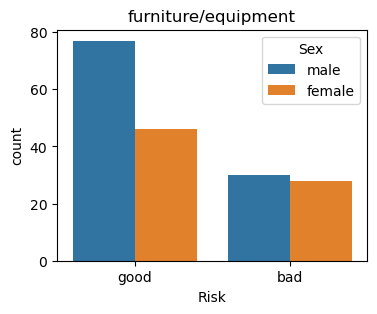

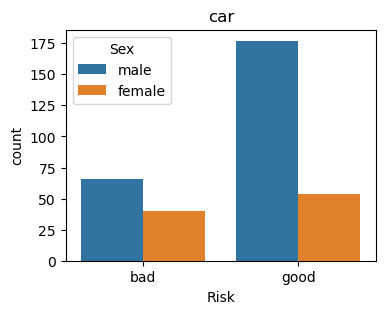

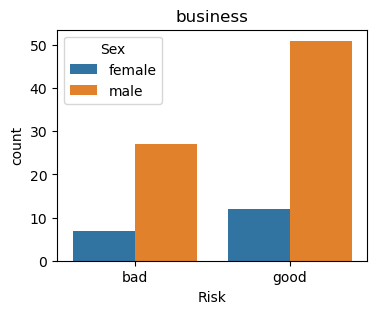

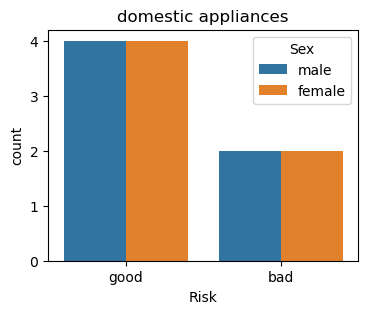

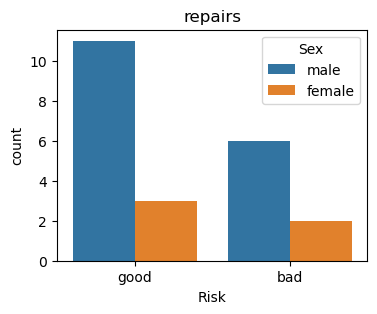

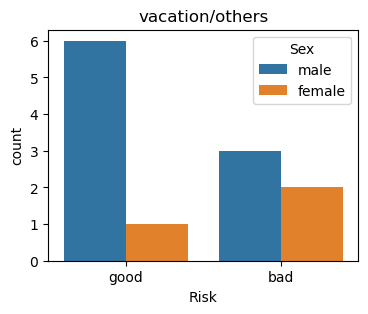

In [50]:
for purpose in df['Purpose'].unique():
    plt.figure(figsize=(4, 3))
    sns.countplot(x='Risk', hue='Sex', data=df[df['Purpose'] == purpose])
    plt.title(f'{purpose}')
    plt.show()

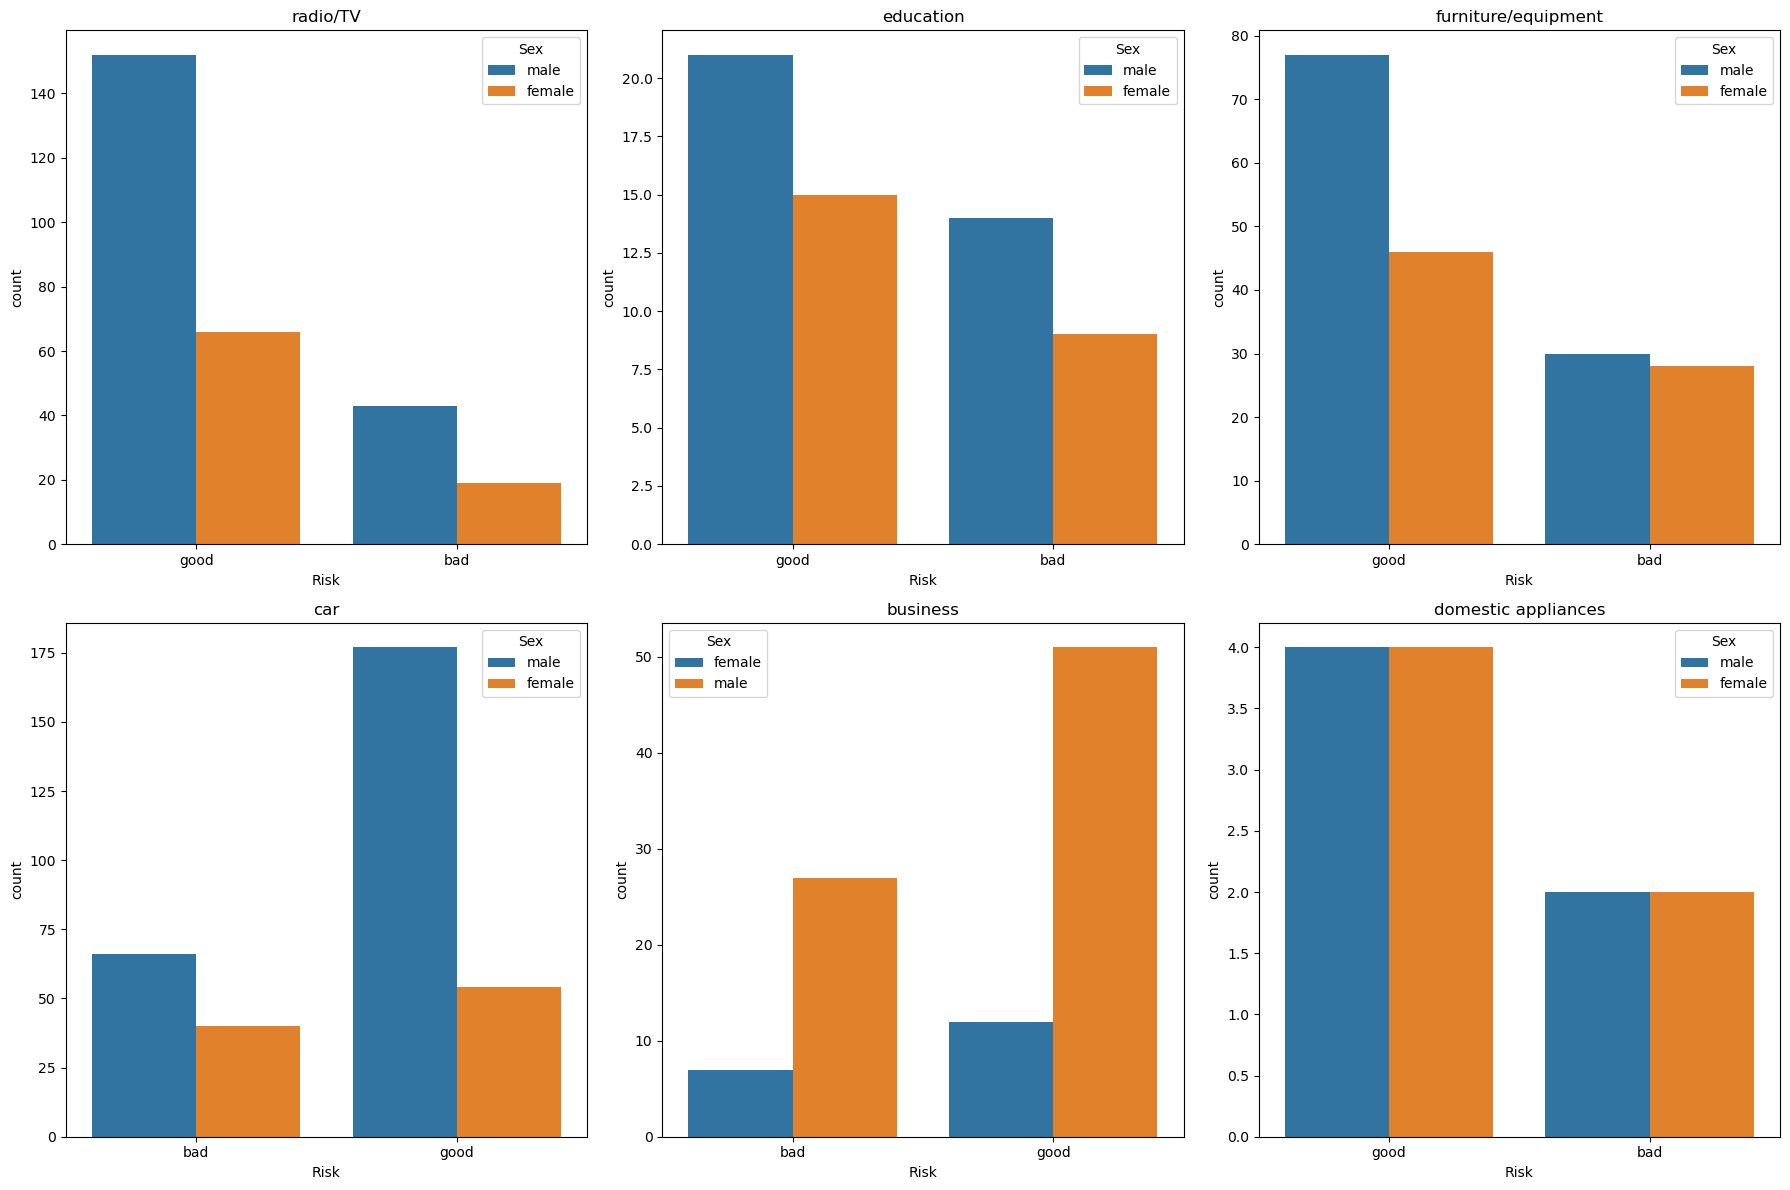

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, ax in enumerate(axes.flat):
    if i < len(df['Purpose'].unique()):
        purpose = df['Purpose'].unique()[i]
        sns.countplot(x='Risk', hue='Sex', data=df[df['Purpose'] == purpose], ax=ax)
        ax.set_title(f'{purpose}')
        

plt.tight_layout()
plt.show()

In [54]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

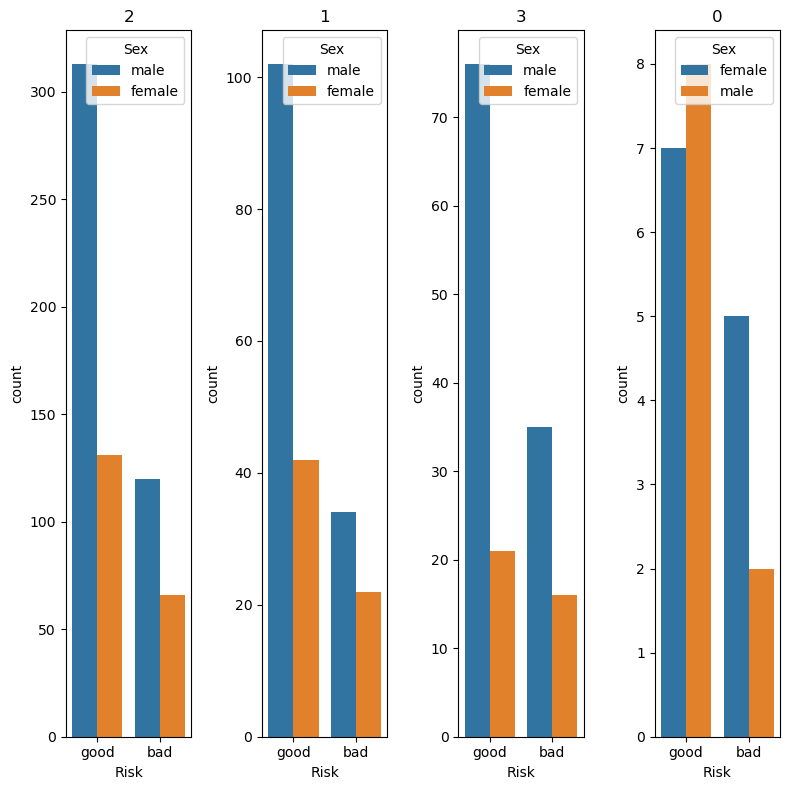

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(df['Job'].unique()):
        purpose = df['Job'].unique()[i]
        sns.countplot(x='Risk', hue='Sex', data=df[df['Job'] == purpose], ax=ax)
        ax.set_title(f'{purpose}')
        

plt.tight_layout()
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


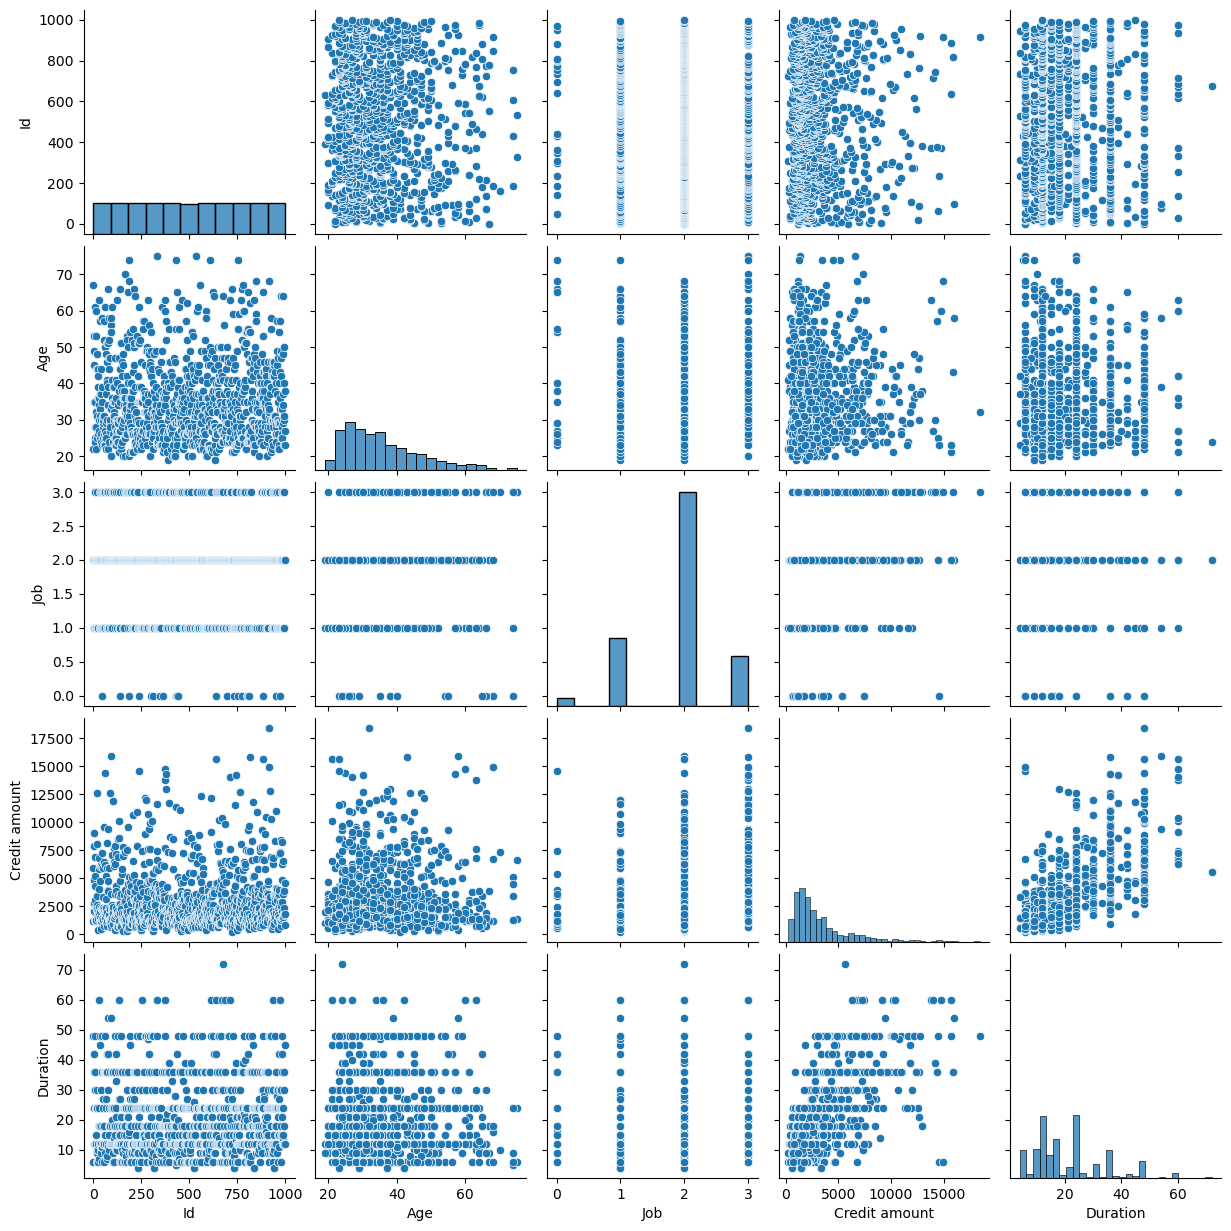

In [62]:
sns.pairplot(df)

<Axes: xlabel='Risk', ylabel='count'>

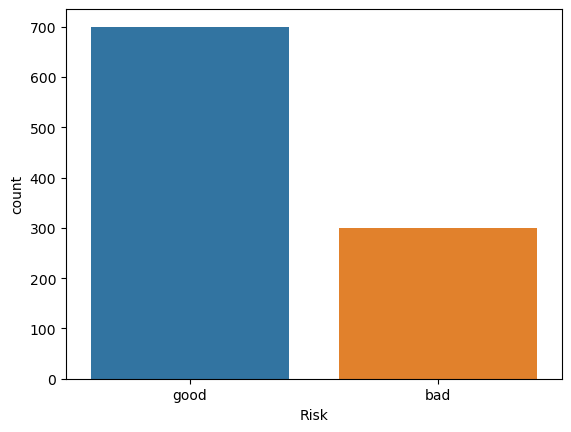

In [63]:
sns.countplot(x=df['Risk'])

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [53]:
df.head(1)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good


In [54]:
a=pd.get_dummies(df['Purpose'],drop_first=True,dtype=int)

In [55]:
a

,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0
996,1,0,0,0,0,0,0
997,0,0,0,0,1,0,0
998,0,0,0,0,1,0,0


#### Use label encoding for rest of the categorical data

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [57]:
df['Sex']=encoder.fit_transform(df['Sex'])


In [58]:
df['Housing']=encoder.fit_transform(df['Housing'])

In [59]:
df['Saving accounts']=encoder.fit_transform(df['Saving accounts'])

In [60]:
df['Checking account']=encoder.fit_transform(df['Checking account'])

In [61]:
df['Risk']=encoder.fit_transform(df['Risk'])

In [62]:
df=pd.concat([df,a],axis=1)

In [63]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,67,1,2,1,0,1,1169,6,radio/TV,1,0,0,0,0,1,0,0
1,1,22,0,2,1,1,2,5951,48,radio/TV,0,0,0,0,0,1,0,0
2,2,49,1,1,1,1,0,2096,12,education,1,0,0,1,0,0,0,0
3,3,45,1,2,0,1,1,7882,42,furniture/equipment,1,0,0,0,1,0,0,0
4,4,53,1,2,0,1,1,4870,24,car,0,1,0,0,0,0,0,0


In [64]:
df.drop(columns=['Purpose'],inplace=True)

In [65]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,67,1,2,1,0,1,1169,6,1,0,0,0,0,1,0,0
1,1,22,0,2,1,1,2,5951,48,0,0,0,0,0,1,0,0
2,2,49,1,1,1,1,0,2096,12,1,0,0,1,0,0,0,0
3,3,45,1,2,0,1,1,7882,42,1,0,0,0,1,0,0,0
4,4,53,1,2,0,1,1,4870,24,0,1,0,0,0,0,0,0


### Check the unique values in the new dataframe

In [66]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}: {df[column].unique()}")

### Plot heatmap

<Axes: >

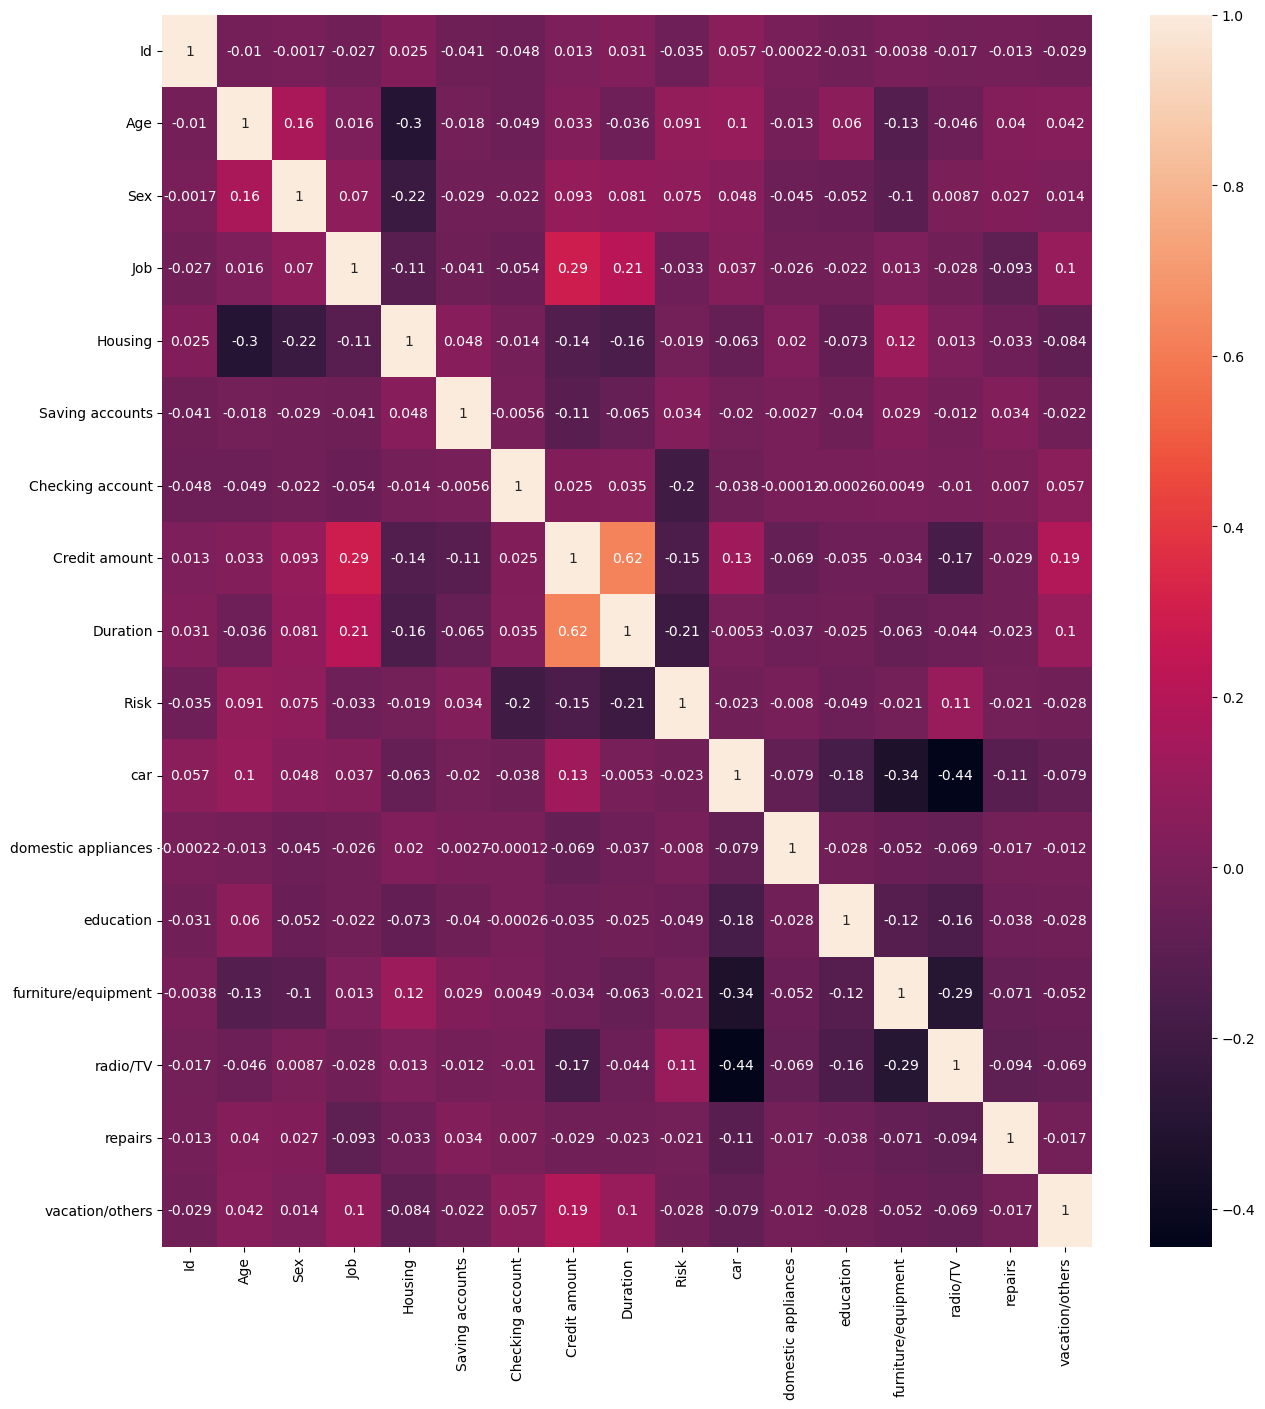

In [67]:
plt.figure(figsize=(15,16))
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Select the Dependent(target) and Independent Variables:

In [68]:
X=df.drop(columns=['Risk'])
y=df[['Risk']]

# Standardize the data

In [69]:
from sklearn.preprocessing import StandardScaler


In [70]:
scaler=StandardScaler()

In [71]:
x_scaled=scaler.fit_transform(X)

In [72]:
pd.DataFrame(x_scaled,columns=X.columns)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,-1.730320,2.766456,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.745131,-1.236478,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.726856,-1.191404,-1.491914,0.146949,-0.133710,-0.196609,1.044372,0.949817,2.248194,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,-1.723391,1.183312,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.416562,-0.738668,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,-1.719927,0.831502,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.634247,1.750384,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,-1.716463,1.535122,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.566664,0.256953,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,-0.399832,-1.491914,-1.383771,-0.133710,-0.196609,-1.046463,-0.544162,-0.738668,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
996,1.719927,0.391740,0.670280,1.677670,-0.133710,-0.196609,-0.001045,0.207612,0.754763,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
997,1.723391,0.215835,0.670280,0.146949,-0.133710,-0.196609,-1.046463,-0.874503,-0.738668,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
998,1.726856,-1.103451,0.670280,0.146949,-2.016956,-0.196609,-0.001045,-0.505528,1.999289,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208


# Split the data into training and testing set

In [73]:
from sklearn.model_selection import train_test_split


In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [75]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [42]:
modelrfc=RandomForestClassifier()

In [43]:
modelrfc.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [44]:
y_predrfc=modelrfc.predict(X_test)

In [35]:
param1={'max_depth': [0.5, 1, 5, 10],'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],'random_state': [1, 10, 20, 42]}

In [36]:
gsv1=GridSearchCV(RandomForestClassifier(),param1,scoring='accuracy')

In [37]:
gsv1.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]},
             scoring='accuracy')

In [38]:
gsv1.best_params_

{'max_depth': 10, 'n_estimators': 50, 'n_jobs': 1, 'random_state': 1}

In [39]:
print('Best estimator is:',gsv1.best_estimator_)
print('Best parameters are:',gsv1.best_params_)
print('Best score is:',gsv1.best_score_)

Best estimator is: RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=1, random_state=1)
Best parameters are: {'max_depth': 10, 'n_estimators': 50, 'n_jobs': 1, 'random_state': 1}
Best score is: 0.7485714285714286


In [40]:
gsv1.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=1, random_state=1)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [41]:
accuracy_score(y_predrfc,y_test)

0.72

#### Visualize the confusion matrix

<Axes: >

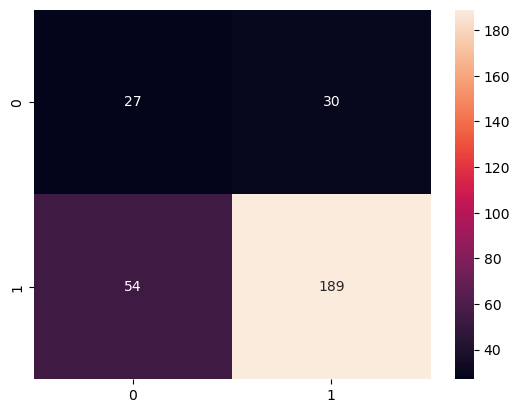

In [42]:
sns.heatmap(confusion_matrix(y_predrfc,y_test),annot=True,fmt='d')

## SupportVectorClassifier:

In [43]:
from sklearn.svm import SVC

In [44]:
modelsvc=SVC()

In [45]:
modelsvc.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [46]:
y_predsvc=modelsvc.predict(X_test)

In [56]:
param2={'C': [0.75, 0.85], 'degree': [3, 4],'kernel': ['linear']}

In [57]:
gsv2=GridSearchCV(SVC(),param2,scoring='accuracy')

In [59]:
gsv2.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
gsv2.best_params_

In [70]:
print('Accuracy Score:',accuracy_score(y_predsvc,y_test))
print('Confusion Matrix:',confusion_matrix(y_predsvc,y_test))

Accuracy Score: 0.7166666666666667
Confusion Matrix: [[  5   9]
 [ 76 210]]


In [85]:
cross_val_scores = cross_val_score(modelsvc, X, y, cv=5)
print("Mean cross-validation score:", cross_val_scores.mean())

Mean cross-validation score: 0.708


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

## LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
modellr=LogisticRegression()

In [73]:
modellr.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
y_predlr=modellr.predict(X_test)

In [76]:
print('Accuracy Score:',accuracy_score(y_predlr,y_test))

Accuracy Score: 0.7033333333333334


In [77]:
print('Condusion Matrix:',confusion_matrix(y_predlr,y_test))

Condusion Matrix: [[ 13  21]
 [ 68 198]]


<Axes: >

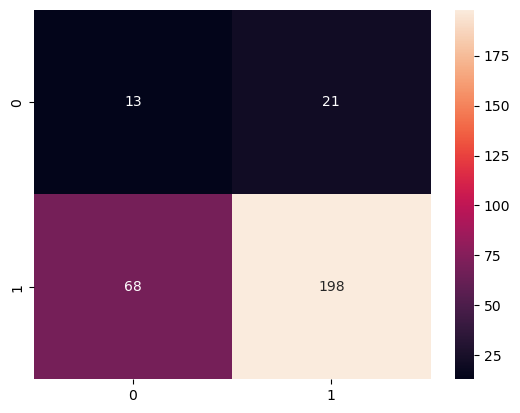

In [80]:
sns.heatmap(confusion_matrix(y_predlr,y_test),annot=True,fmt='d')

In [84]:
cross_val_scores = cross_val_score(modellr, X, y, cv=5)
print("Mean cross-validation score:", cross_val_scores.mean())

Mean cross-validation score: 0.702


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

## AdaBoost: Classifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
modelab=AdaBoostClassifier()

In [102]:
modelab.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [103]:
y_predab=modelab.predict(X_test)

In [104]:
print('Accuracy Score:',accuracy_score(y_predab,y_test))

Accuracy Score: 0.7533333333333333


In [105]:
print('Confusion Matrix:',confusion_matrix(y_predab,y_test))

Confusion Matrix: [[ 38  31]
 [ 43 188]]


<Axes: >

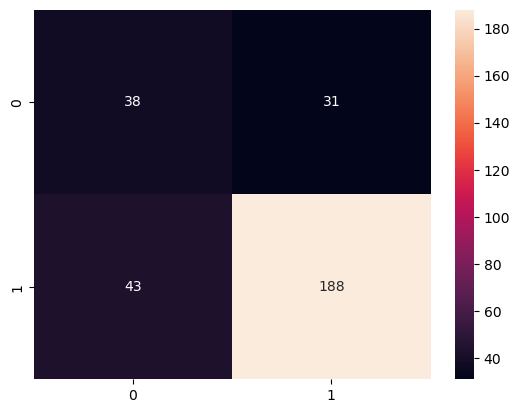

In [96]:
sns.heatmap(confusion_matrix(y_predab,y_test),annot=True,fmt='d')

#### View scores of the different models 

In [97]:

scores = {'Model': ['Logistic Regression', 'Random Forest Classifier', 'Support Vector Classifier', 'Gradient Boost Classifier'],
    'Accuracy': [accuracy_score(y_test, y_predlr),accuracy_score(y_test, y_predrfc),accuracy_score(y_test, y_predsvc),accuracy_score(y_test, y_predab)]}

pd.DataFrame(scores)



,Model,Accuracy
0,Logistic Regression,0.703333
1,Random Forest Classifier,0.720000
2,Support Vector Classifier,0.716667
3,Gradient Boost Classifier,0.753333


## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [45]:
from sklearn.decomposition import PCA


In [46]:
pca=PCA(n_components=5)

In [47]:
x1=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x1.head()


,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,-1.730320,2.766456,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.745131,-1.236478,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.726856,-1.191404,-1.491914,0.146949,-0.133710,-0.196609,1.044372,0.949817,2.248194,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,-1.723391,1.183312,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.416562,-0.738668,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,-1.719927,0.831502,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.634247,1.750384,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,-1.716463,1.535122,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.566664,0.256953,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


In [112]:
x_pca=pd.DataFrame(pca.fit_transform(X))

In [113]:
x_pca.head()

,0,1,2,3,4
0,-2102.980695,496.588982,32.598376,2.996025,-1.229275
1,2679.105106,502.212496,-17.565144,-17.538158,-0.484438
2,-1175.968563,495.870946,14.146461,2.802027,0.103869
3,4610.086177,502.925373,6.835360,-10.666561,-0.046607
4,1598.054296,497.737229,16.901826,-2.380262,-0.168469


In [48]:
#Apply the mapping (transform) to both the training set and the test set.
train_X =pca.fit_transform(X_train)
test_X =pca.fit_transform(X_test)


**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [119]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [120]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [121]:
model=LogisticRegression()

In [122]:
model.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
y_pred=model.predict(X_test)

In [124]:
model.score(X_train,y_train)

0.7114285714285714

In [125]:
#Confusion Matrix
confusion_matrix(y_pred,y_test)


array([[ 13,  21],
       [ 68, 198]], dtype=int64)

In [126]:
accuracy_score(y_pred,y_test)

0.7033333333333334

In [128]:
cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score:", cross_val_scores.mean())

Mean cross-validation score: 0.702


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

## Model Deployment With Tkinter

### Import Tkinter Library

In [117]:
from tkinter import *
from tkinter.ttk import Combobox,Button

### Define a function that will output to an entry box in Tkinter

In [119]:
def risk():
    id1=int(Id.get())
    age1=int(Age.get())
    sex1=Sex.get()
    job1=Job.get()
    house1=housing.get()
    saving1=saving.get()
    check1=checking.get()
    credit1=int(credit.get())
    purpose1=Purpose.get()
    duration1=int(Duration.get())
    
    #risk='High'
    
    #result.set(risk)
    
    if sex1=='Male':
        sex1=1
    else:
        sex1=0
        
        
    if job1=='Daily Wager':
        job1=0
    elif job1=='Employee':
        job1=1
    else:
        job1=2
        
    
    if house1=='Own':
        house1=0
    elif house1=='Free':
        house1=1
    else:
        house1=2
        
        
    if saving1=='Nil':
        saving1=0
    elif saving1=='Low':
        saving1=1
    elif saving1=='Avg':
        saving1=2
    elif saving1=='High':
        saving1=3
    else:
        saving1=4

        
    
    if check1=='Nil':
        check1=0
    elif check1=='Low':
        check1=1
    elif check1=='Avg':
        check1=2
    else:
        check1=3
        
            
    if purpose1=='car':
        car=1
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
        
    elif purpose1=='domestic appliances':
        car=0
        domestic_appliances=1
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0

    elif purpose1=='education':
        car=0
        domestic_appliances=0
        education=1
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
        
    elif purpose1=='furniture/equipment':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=1
        radio_TV=0
        repairs=0
        vacation_others=0

    elif purpose1=='radio/TV':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=1
        repairs=0
        vacation_others=0
        
    elif purpose1=='repairs':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=1
        vacation_others=0
        
    else:
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=1 
        
    x2=scaler.transform([[id1,age1,sex1,job1,house1,saving1,check1,credit1,car,domestic_appliances,education,furniture_equipment,radio_TV,repairs,vacation_others,duration1]])
    
    prediction=modelab.predict(x2)
    
    print(prediction)
    
    result.delete(0,END)
    
    if prediction[0]==0:
        result.insert(0,'Risky')
    else:
        result.insert(0,'Not Risky ')

### Create Tkinter window with all necessary entryboxes and labels

In [120]:
window=Tk()
window.title('Credit Risk Analysis')
window.geometry('400x600')

titlelabel=Label(window,text='Credit Risk Prediction').pack(fill='both')
Label(window).pack()

Idlabel=Label(window,text='ID').pack()
Id=Entry(window)
Id.pack()


Agelabel=Label(window,text='Age').pack()
Age=Entry(window)
Age.pack()

Sexlabel=Label(window,text='Sex').pack()
Sex=Combobox(window)
Sex['values']=('Male','Female')
Sex.current(0)
Sex.pack()

Joblabel=Label(window,text='Job').pack()
Job=Combobox(window)
Job['values']=('Daily Wager','Employee','Professional')
Job.current(0)
Job.pack()

Houselabel=Label(window,text='House').pack()
housing=Combobox(window)
housing['values']=('Own','Free','Rent')
housing.current(0)
housing.pack()

Savinglabel=Label(window,text='Savings Account').pack()
saving=Combobox(window)
saving['values']=('Nil','Low','Avg','High','Very High')
saving.current(2)
saving.pack()


Checkinglabel=Label(window,text='Checking Account').pack()
checking=Combobox(window)
checking['values']=('Nil','Low','Avg','High')
checking.current(2)
checking.pack()

Creditlabel=Label(window,text='Credit Amount:').pack()
credit=Entry(window)
credit.pack()

Purposelabel=Label(window,text='Purpose').pack()
Purpose=Combobox(window)
Purpose['values']=('car','domestic appliances','education','furniture/equipment','radio/TV','repairs','vacation/others')
Purpose.current(0)
Purpose.pack()


Durationlabel=Label(window,text='Duration:').pack()
Duration=Entry(window)
Duration.pack()

button=Button(window,text='Predict Risk ', command=risk)
button.pack()

result = Entry(window)
result.pack()


window.mainloop()


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[1]
